In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D

from scipy.sparse.linalg import eigs, eigsh
from scipy import sparse

In [2]:
N = 150
X, Y = np.meshgrid(np.linspace(0,1,N), np.linspace(0,1,N))

In [72]:
def get_potential(x,y):
    return np.zeros((len(x), len(y)))

V = get_potential(X,Y)

In [20]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))

H = T + U

In [22]:
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')

In [46]:
def get_e(n):

    return eigenvectors.T[n].reshape((N,N))

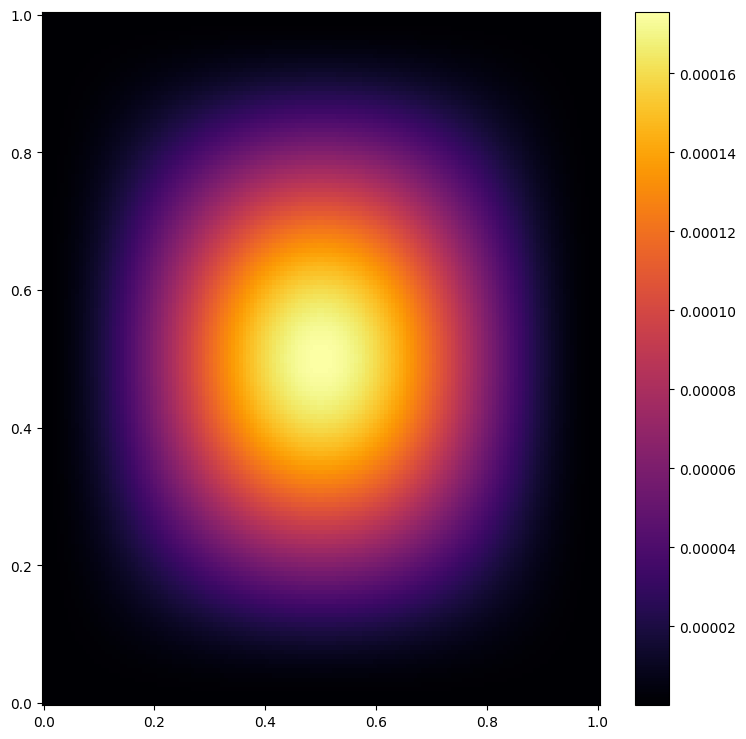

In [77]:
plt.figure(figsize=(9,9))
plt.pcolormesh(X, Y, get_e(0)**2, cmap='inferno')
plt.colorbar()

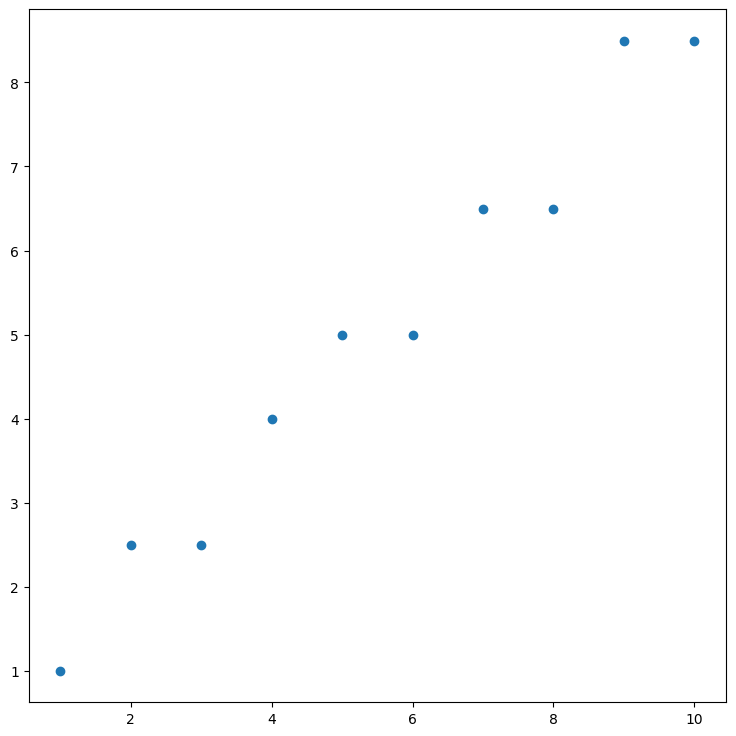

In [71]:
plt.figure(figsize=(9,9))
plt.scatter(np.linspace(1,10,10), eigenvalues/eigenvalues[0])
